# All Sites Random Forest
## Notebook #6 with bin1 redo
* making the same plots as in Random Forest Notebook #6, but updating bin 1 to match the new decision tree results in AllSites_RandomForest_3_bin1redo.ipynb
* including new plots, probability density functions(PDFs) for the feature variables 
* leaving the other notebook untouched in case I want to use those plots agian 
* the plots in this notebook are the final plots used to create the random forest results figures in the WADNR final report 

created by Cassie Lumbrazo\
date: July 2023\
python environment: **raster**


In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus 
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

### Load the merged and subsampled data into a pkl (saved in Notebook 4 first)

In [3]:
filename = '/home/lumbraca/raster/data/allsites_snowdepth_dem_dah_tpi_dce.pkl'
# pickle.dump(df, open(filename, 'wb')) # wb, writing 

df = pickle.load(open(filename, 'rb')) # rb, reading 
df.head()

,snowdepth,dem,dah,tpi,dce,ce,sr,fl
88289,0.545976,819.582886,-6.947569,-141.727295,-8.430352,ce,NaN,NaN
88914,0.519857,819.417725,-6.077637,-173.110062,-6.593832,ce,NaN,NaN
90788,0.899815,820.030823,-5.040730,-205.761093,-9.144000,ce,NaN,NaN
91413,0.881211,820.017517,-4.691245,-201.752899,-7.315200,ce,NaN,NaN
92038,0.654621,819.966675,-11.042705,-220.336624,-5.562078,ce,NaN,NaN


# Calculate the snow depth values inside the decision trees 

In [4]:
color_num1 = 'teal' # darkcyan
color_num2 = 'red'

color_more = 'teal' # darkcyan
color_less = 'red'

In [5]:
all_bin1 = df.where(df.dem < 960)                       # less than 1300
all_bin2 = df.where((df.dem >= 1030) & (df.dem < 1320)) # greater than or = 1300, less than 1370
all_bin3 = df.where(df.dem >= 1350)                     # greater than than 1370

## Bin 1

In [6]:
# building the decision tree from top to bottom, row one through three (l:left, to r:right decisions)
# row one 
bin1_l = all_bin1.snowdepth.where((all_bin1.dce <= 6.5)) 
bin1_r = all_bin1.snowdepth.where((all_bin1.dce >  6.5))

# row two
bin1_ll = all_bin1.snowdepth.where((all_bin1.dce <= 6.5) & (all_bin1.dah <= -0.05)) 
bin1_lr = all_bin1.snowdepth.where((all_bin1.dce <= 6.5) & (all_bin1.dah >  -0.05))
bin1_rl = all_bin1.snowdepth.where((all_bin1.dce >  6.5) & (all_bin1.dah <= -2.185))
bin1_rr = all_bin1.snowdepth.where((all_bin1.dce >  6.5) & (all_bin1.dah >  -2.185))

# row three
bin1_lll = all_bin1.snowdepth.where((all_bin1.dce <= 6.5) & (all_bin1.dah <= -0.05 ) & (all_bin1.dce <=  2.5  ))  
bin1_llr = all_bin1.snowdepth.where((all_bin1.dce <= 6.5) & (all_bin1.dah <= -0.05 ) & (all_bin1.dce >   2.5  ))

bin1_lrl = all_bin1.snowdepth.where((all_bin1.dce <= 6.5) & (all_bin1.dah >  -0.05 ) & (all_bin1.tpi <= -5.025)) 
bin1_lrr = all_bin1.snowdepth.where((all_bin1.dce <= 6.5) & (all_bin1.dah >  -0.05 ) & (all_bin1.tpi >  -5.025))

bin1_rll = all_bin1.snowdepth.where((all_bin1.dce >  6.5) & (all_bin1.tpi <= -2.185) & (all_bin1.dce <=  13.5)) 
bin1_rlr = all_bin1.snowdepth.where((all_bin1.dce >  6.5) & (all_bin1.tpi <= -2.185) & (all_bin1.dce >   13.5))

bin1_rrl = all_bin1.snowdepth.where((all_bin1.dce >  6.5) & (all_bin1.tpi >  -2.185) & (all_bin1.tpi <= 2.345)) 
bin1_rrr = all_bin1.snowdepth.where((all_bin1.dce >  6.5) & (all_bin1.tpi >  -2.185) & (all_bin1.tpi >  2.345))

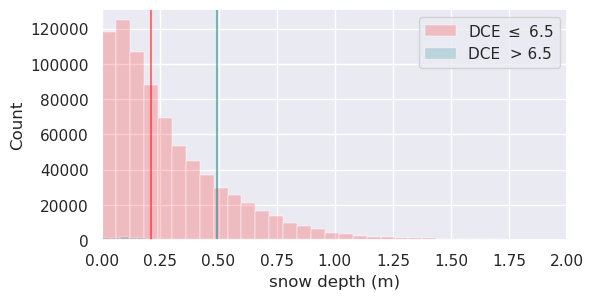

In [21]:
# Figure for all random forest results
# Bin 1, Row 1
plt.rcParams['figure.figsize'] = [6,3] #overriding size
sns.histplot(data=bin1_l, bins=100, color=color_less, label='DCE $\leq$ 6.5', alpha=.2)
sns.histplot(data=bin1_r, bins=100, color=color_more, label='DCE  > 6.5', alpha=.2)

plt.axvline(x=bin1_l.median(),  color=color_less, alpha=.5) 
plt.axvline(x=bin1_r.median(),  color=color_more, alpha=.5) 

# plt.title('Bin 1 Row 1 \nDCE at 6.5')
# plt.ylim([0,2000])
plt.xlim([0,2])

plt.xlabel('snow depth (m)')
plt.legend()

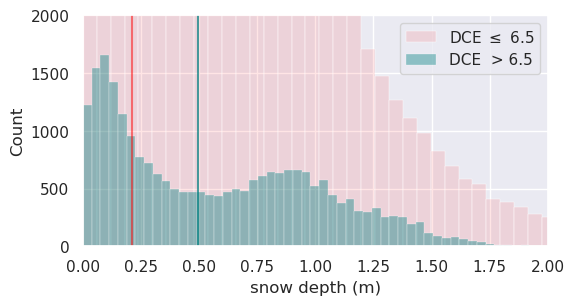

In [18]:
# Figure for all random forest results
# Bin 1, Row 1
plt.rcParams['figure.figsize'] = [6,3] #overriding size
sns.histplot(data=bin1_l, bins=100, color=color_less, label='DCE $\leq$ 6.5', alpha=.1)
sns.histplot(data=bin1_r, bins=100, color=color_more, label='DCE  > 6.5', alpha=.4)

plt.axvline(x=bin1_l.median(),  color=color_less, alpha=.5) 
plt.axvline(x=bin1_r.median(),  color=color_more, alpha=.7) 

# plt.title('Bin 1 Row 1 \nDCE at 6.5')
plt.ylim([0,2000])
plt.xlim([0,2])

plt.xlabel('snow depth (m)')
plt.legend()

(0.0, 2.0)

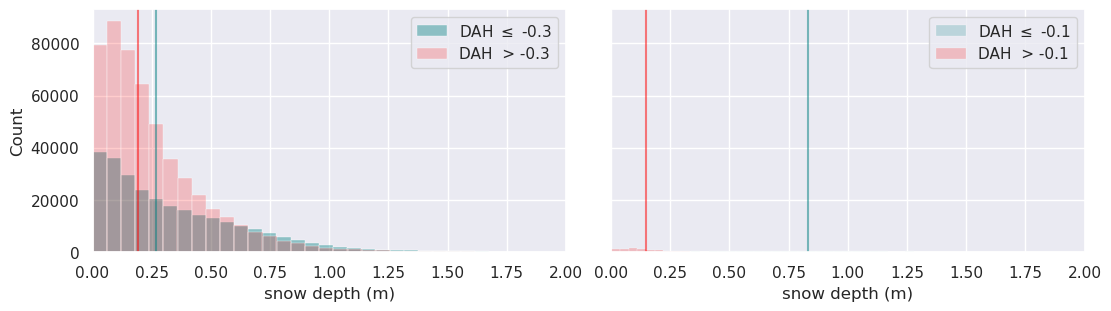

In [17]:
# Figure for all random forest results
# Bin 1, Row 2
fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)
# fig.suptitle('Bin 1 Row 2')

# DAH
sns.histplot(ax=axes[0], data=bin1_ll, bins=100, color=color_more, label='DAH $\leq$ -0.3', alpha=.4)
axes[0].axvline(x=bin1_ll.median(),  color=color_more, alpha=.5) 

sns.histplot(ax=axes[0], data=bin1_lr, bins=100, color=color_less, label='DAH  > -0.3', alpha=.2)
axes[0].axvline(x=bin1_lr.median(),  color=color_less, alpha=.5) 

# DAH in the gap (CHANGED)
sns.histplot(ax=axes[1], data=bin1_rl, bins=100, color=color_more, label='DAH $\leq$ -0.1', alpha=.2)
axes[1].axvline(x=bin1_rl.median(),  color=color_more, alpha=.5) 

sns.histplot(ax=axes[1], data=bin1_rr, bins=100, color=color_less, label='DAH  > -0.1', alpha=.2)
axes[1].axvline(x=bin1_rr.median(),  color=color_less, alpha=.5) 

# OLD LABELS   
# axes[0].set_title("DAH $\leq$ -0.3")
# axes[1].set_title("TPI $\leq$ -2.2")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()

# Set limits 
axes[0].set_xlim([0, 2])
axes[1].set_xlim([0, 2])

# axes[0].set_ylim([0, 10000])
# axes[1].set_ylim([0, 10000])

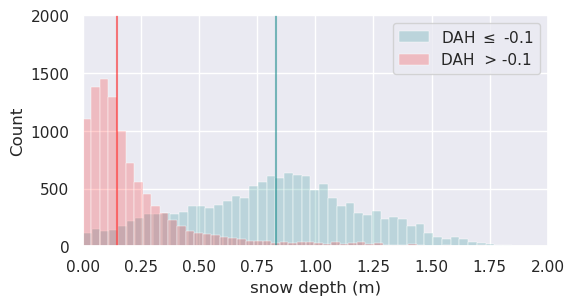

In [19]:
# Figure for all random forest results
# Bin 1, Row 2
plt.rcParams['figure.figsize'] = [6,3] #overriding size
# DAH in the gap (CHANGED)
sns.histplot(data=bin1_rl, bins=100, color=color_more, label='DAH $\leq$ -0.1', alpha=.2)
plt.axvline(x=bin1_rl.median(),  color=color_more, alpha=.5) 

sns.histplot(data=bin1_rr, bins=100, color=color_less, label='DAH  > -0.1', alpha=.2)
plt.axvline(x=bin1_rr.median(),  color=color_less, alpha=.5) 

# plt.title('Bin 1 Row 1 \nDCE at 6.5')
plt.ylim([0,2000])
plt.xlim([0,2])

plt.xlabel('snow depth (m)')
plt.legend()

(0.0, 2.0)

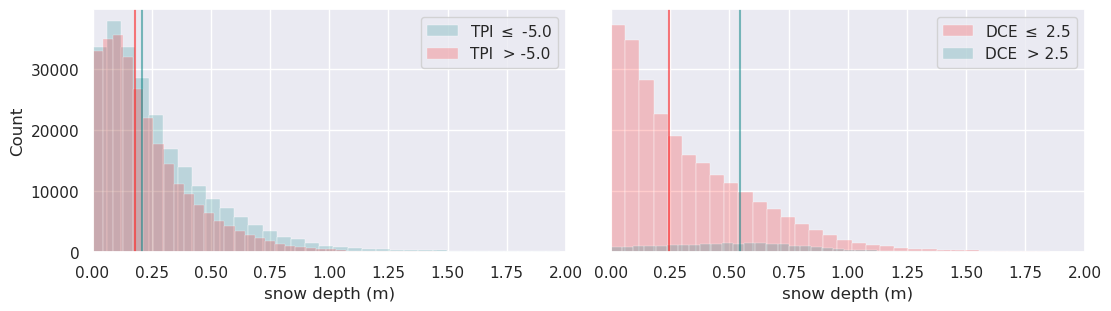

In [23]:
# Figure for all random forest results
# Bin 1, Row 3
# fig, axes = plt.subplots(1,4, figsize=(22,3), constrained_layout = True, sharex=True, sharey=True)
fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)
# fig.suptitle('Bin 1 Row 3')


# Switching TPI and DCE for the updated plot
# TPI
sns.histplot(ax=axes[0], data=bin1_lrl, bins=100, color=color_num1, label='TPI $\leq$ -5.0', alpha=.2)
sns.histplot(ax=axes[0], data=bin1_lrr, bins=100, color=color_num2, label='TPI  > -5.0', alpha=.2)

axes[0].axvline(x=bin1_lrl.median(),  color=color_num1, alpha=.5) 
axes[0].axvline(x=bin1_lrr.median(),  color=color_num2, alpha=.5) 

# DCE
sns.histplot(ax=axes[1], data=bin1_lll, bins=100, color=color_num2, label='DCE $\leq$ 2.5', alpha=.2)
sns.histplot(ax=axes[1], data=bin1_llr, bins=100, color=color_num1, label='DCE  > 2.5', alpha=.2)

axes[1].axvline(x=bin1_lll.median(),  color=color_num2, alpha=.5) 
axes[1].axvline(x=bin1_llr.median(),  color=color_num1, alpha=.5) 


# # DCE not using these anymore
# sns.histplot(ax=axes[2], data=bin1_rll, bins=100, color=color_num2, label='DCE $\leq$ 14', alpha=.2)
# sns.histplot(ax=axes[2], data=bin1_rlr, bins=100, color=color_num1, label='DCE  > 14', alpha=.2)

# axes[2].axvline(x=bin1_rll.median(),  color=color_num2, alpha=.5) 
# axes[2].axvline(x=bin1_rlr.median(),  color=color_num1, alpha=.5) 

# # TPI
# sns.histplot(ax=axes[3], data=bin1_rrl, bins=100, color=color_num2, label='TPI $\leq$ 2.3', alpha=.2)
# sns.histplot(ax=axes[3], data=bin1_rrr, bins=100, color=color_num1, label='TPI  > 2.3', alpha=.2)

# axes[3].axvline(x=bin1_rrl.median(),  color=color_num2, alpha=.5) 
# axes[3].axvline(x=bin1_rrr.median(),  color=color_num1, alpha=.5) 

# OLD LABELS 
# axes[0].set_title("DCE $\leq$ 2.5")
# axes[1].set_title("TPI $\leq$ -5.0")
# axes[2].set_title("DCE $\leq$ 14")
# axes[3].set_title("TPI $\leq$ 2.3")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')
# axes[2].set_xlabel('snow depth (m)')
# axes[3].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()
# axes[2].legend()
# axes[3].legend()

# Set limits 
# Set limits 
axes[0].set_xlim([0, 2])
axes[1].set_xlim([0, 2])
# axes[2].set_xlim([0, 2])
# axes[3].set_xlim([0, 2])

# axes[0].set_ylim([0, 10000])
# axes[1].set_ylim([0, 10000])
# axes[2].set_ylim([0, 10000])
# axes[3].set_ylim([0, 10000])


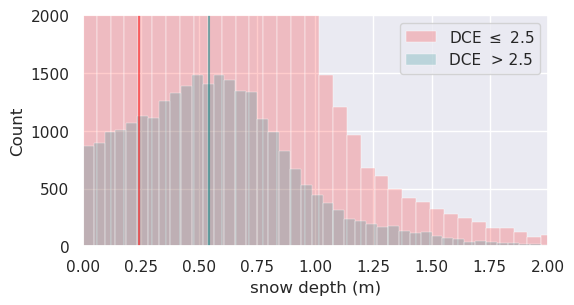

In [20]:
# Figure for all random forest results
# Bin 1, Row 3
plt.rcParams['figure.figsize'] = [6,3] #overriding size

# DCE from above
sns.histplot(data=bin1_lll, bins=100, color=color_num2, label='DCE $\leq$ 2.5', alpha=.2)
sns.histplot(data=bin1_llr, bins=100, color=color_num1, label='DCE  > 2.5', alpha=.2)

plt.axvline(x=bin1_lll.median(),  color=color_num2, alpha=.5) 
plt.axvline(x=bin1_llr.median(),  color=color_num1, alpha=.5) 

plt.ylim([0,2000])
plt.xlim([0,2])

plt.xlabel('snow depth (m)')
plt.legend()

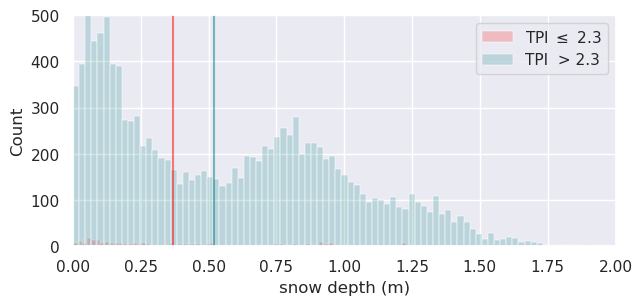

In [41]:
# Figure for all random forest results
# Bin 1, Row 3
plt.rcParams['figure.figsize'] = [7,3] #overriding size

# TPI from above 
sns.histplot(data=bin1_rrl, bins=100, color=color_num2, label='TPI $\leq$ 2.3', alpha=.2)
sns.histplot(data=bin1_rrr, bins=100, color=color_num1, label='TPI  > 2.3', alpha=.2)

plt.axvline(x=bin1_rrl.median(),  color=color_num2, alpha=.5) 
plt.axvline(x=bin1_rrr.median(),  color=color_num1, alpha=.5) 

plt.ylim([0,500])
plt.xlim([0,2])

plt.xlabel('snow depth (m)')
plt.legend()

## Bin 2

In [29]:
# building the decision tree from top to bottom, row one through three (l:left, to r:right decisions)
# row one 
bin2_l = all_bin2.snowdepth.where((all_bin2.dce <= -0.5))
bin2_r = all_bin2.snowdepth.where((all_bin2.dce >  -0.5))

# row two 
bin2_ll = all_bin2.snowdepth.where((all_bin2.dce <= -0.5) & (all_bin2.dah <= -.095))
bin2_lr = all_bin2.snowdepth.where((all_bin2.dce <= -0.5) & (all_bin2.dah >  -.095))
bin2_rl = all_bin2.snowdepth.where((all_bin2.dce >  -0.5) & (all_bin2.dah <=  .225))
bin2_rr = all_bin2.snowdepth.where((all_bin2.dce >  -0.5) & (all_bin2.dah >   .225))

# row three
bin2_lll = all_bin2.snowdepth.where((all_bin2.dce <= -0.5) & (all_bin2.dah <= -.095) & (all_bin2.tpi <= 1.525)) # only difference between a and b is the tpi 
bin2_llr = all_bin2.snowdepth.where((all_bin2.dce <= -0.5) & (all_bin2.dah <= -.095) & (all_bin2.tpi >  1.525))

bin2_lrl = all_bin2.snowdepth.where((all_bin2.dce <= -0.5) & (all_bin2.dah > -.095) & (all_bin2.dce <=  -1.5)) # only difference between c and d is dce
bin2_lrr = all_bin2.snowdepth.where((all_bin2.dce <= -0.5) & (all_bin2.dah > -.095) & (all_bin2.dce >   -1.5))

bin2_rll = all_bin2.snowdepth.where((all_bin2.dce > -0.5)  & (all_bin2.dah <= .225) & (all_bin2.dah <= -.165)) # only difference between e and f is dah
bin2_rlr = all_bin2.snowdepth.where((all_bin2.dce > -0.5)  & (all_bin2.dah <= .225) & (all_bin2.dah >  -.165))

bin2_rrl = all_bin2.snowdepth.where((all_bin2.dce > -0.5)  & (all_bin2.dah >  .225) & (all_bin2.dah <=  .435)) # only difference between g and h is dah
bin2_rrr = all_bin2.snowdepth.where((all_bin2.dce > -0.5)  & (all_bin2.dah >  .225) & (all_bin2.dah >   .435))

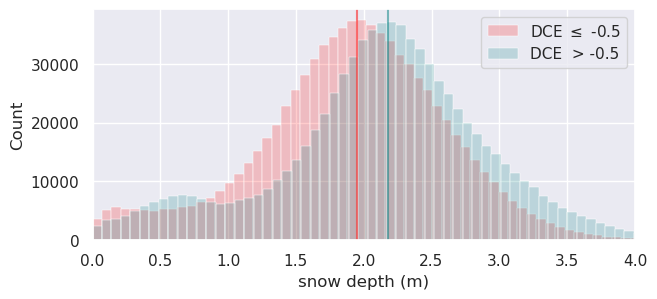

In [33]:
# Figure for all random forest results
# Bin 2, Row 1
plt.rcParams['figure.figsize'] = [7,3] #overriding size
sns.histplot(data=bin2_l, bins=100, color=color_num2, label='DCE $\leq$ -0.5', alpha=.2)
sns.histplot(data=bin2_r, bins=100, color=color_num1, label='DCE  > -0.5', alpha=.2)

plt.axvline(x=bin2_l.median(),  color=color_num2, alpha=.5) 
plt.axvline(x=bin2_r.median(),  color=color_num1, alpha=.5) 

# plt.title('Bin 2 Row 1 \nDCE $\leq$ -0.5')
# plt.ylim([0,2000])
plt.xlim([0,4])

plt.xlabel('snow depth (m)')
plt.legend()

(0.0, 4.0)

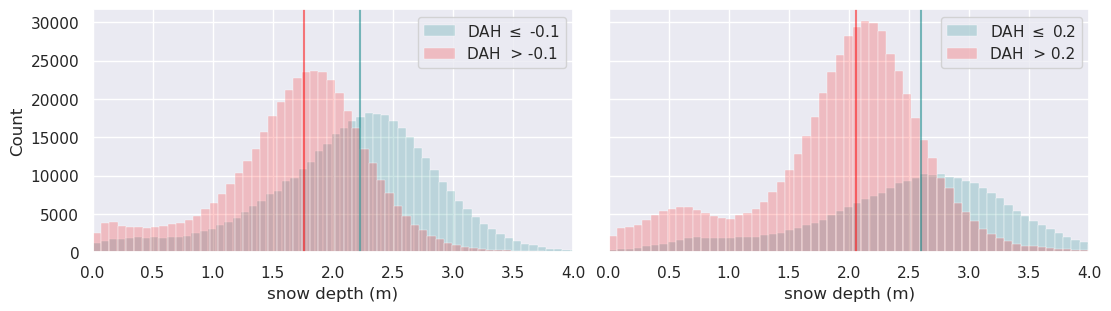

In [31]:
# Figure for all random forest results
# Bin 2, Row 2
fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)
# fig.suptitle('Bin 2 Row 2')

# DAH
sns.histplot(ax=axes[0], data=bin2_ll, bins=100, color=color_num1, label='DAH $\leq$ -0.1', alpha=.2)
axes[0].axvline(x=bin2_ll.median(),  color=color_num1, alpha=.5) 
sns.histplot(ax=axes[0], data=bin2_lr, bins=100, color=color_num2, label='DAH  > -0.1', alpha=.2)
axes[0].axvline(x=bin2_lr.median(),  color=color_num2, alpha=.5) 

# DAH
sns.histplot(ax=axes[1], data=bin2_rl, bins=100, color=color_num1, label='DAH $\leq$ 0.2', alpha=.2)
axes[1].axvline(x=bin2_rl.median(),  color=color_num1, alpha=.5) 
sns.histplot(ax=axes[1], data=bin2_rr, bins=100, color=color_num2, label='DAH  > 0.2', alpha=.2)
axes[1].axvline(x=bin2_rr.median(),  color=color_num2, alpha=.5) 

# OLD LABELS 
# axes[0].set_title("DAH $\leq$ -0.1")
# axes[1].set_title("DAH $\leq$  0.2")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()

# Set limits 
axes[0].set_xlim([0, 4])
axes[1].set_xlim([0, 4])

# axes[0].set_ylim([0, 10000])
# axes[1].set_ylim([0, 10000])

(0.0, 4.0)

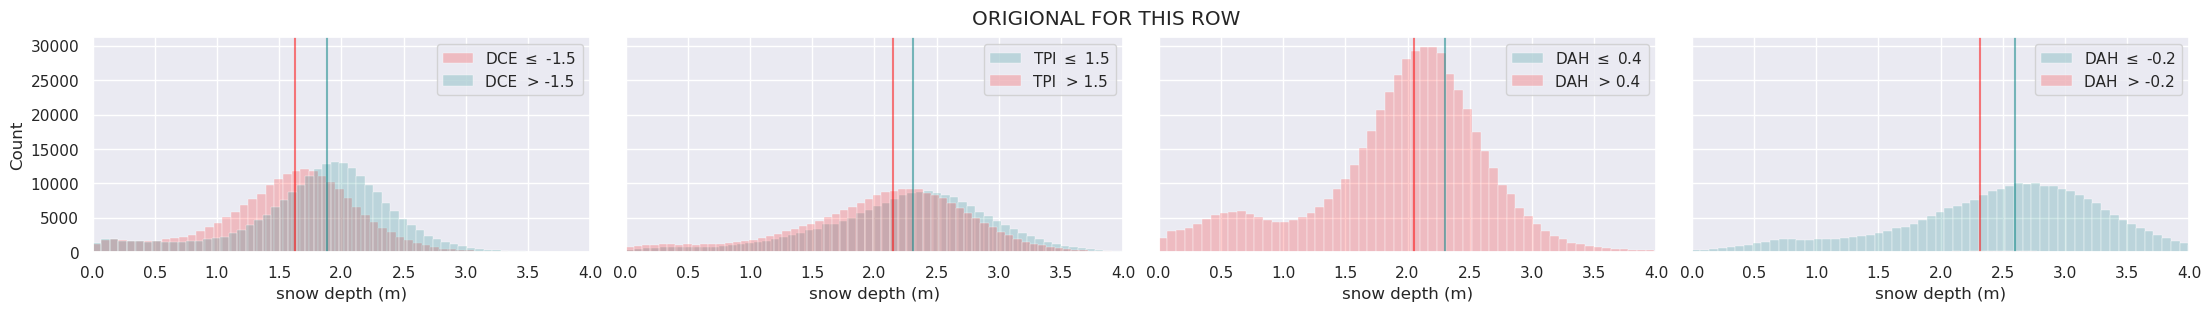

In [37]:
# Figure for all random forest results
fig, axes = plt.subplots(1,4, figsize=(22,3), constrained_layout = True, sharex=True, sharey=True)
# fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)

fig.suptitle('ORIGIONAL FOR THIS ROW')



# TPI
sns.histplot(ax=axes[0], data=bin2_lrl, bins=100, color=color_num2, label='DCE $\leq$ -1.5', alpha=.2)
sns.histplot(ax=axes[0], data=bin2_lrr, bins=100, color=color_num1, label='DCE  > -1.5', alpha=.2)

axes[0].axvline(x=bin2_lrl.median(),  color=color_num2, alpha=.5) 
axes[0].axvline(x=bin2_lrr.median(),  color=color_num1, alpha=.5) 

# DCE
sns.histplot(ax=axes[1], data=bin2_lll, bins=100, color=color_num1, label='TPI $\leq$ 1.5', alpha=.2)
sns.histplot(ax=axes[1], data=bin2_llr, bins=100, color=color_num2, label='TPI  > 1.5', alpha=.2)

axes[1].axvline(x=bin2_lll.median(),  color=color_num1, alpha=.5) 
axes[1].axvline(x=bin2_llr.median(),  color=color_num2, alpha=.5) 



# DAH
sns.histplot(ax=axes[2], data=bin2_rrl, bins=100, color=color_num1, label='DAH $\leq$ 0.4', alpha=.2)
sns.histplot(ax=axes[2], data=bin2_rrr, bins=100, color=color_num2, label='DAH  > 0.4', alpha=.2)

axes[2].axvline(x=bin2_rrl.median(),  color=color_num1, alpha=.5) 
axes[2].axvline(x=bin2_rrr.median(),  color=color_num2, alpha=.5) 

# DAH
sns.histplot(ax=axes[3], data=bin2_rll, bins=100, color=color_num1, label='DAH $\leq$ -0.2', alpha=.2)
sns.histplot(ax=axes[3], data=bin2_rlr, bins=100, color=color_num2, label='DAH  > -0.2', alpha=.2)

axes[3].axvline(x=bin2_rll.median(),  color=color_num1, alpha=.5) 
axes[3].axvline(x=bin2_rlr.median(),  color=color_num2, alpha=.5) 


# OLD LABELS 
# axes[0].set_title("TPI $\leq$  1.5")
# axes[1].set_title("DCE $\leq$ -1.5")
# axes[2].set_title("DAH $\leq$ -0.2")
# axes[3].set_title("DAH $\leq$  0.4")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')
axes[2].set_xlabel('snow depth (m)')
axes[3].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

# Set limits 
axes[0].set_xlim([0, 4])
axes[1].set_xlim([0, 4])
axes[2].set_xlim([0, 4])
axes[3].set_xlim([0, 4])

# axes[0].set_ylim([0, 10000])
# axes[1].set_ylim([0, 10000])
# axes[2].set_ylim([0, 10000])
# axes[3].set_ylim([0, 10000])

(0.0, 2000.0)

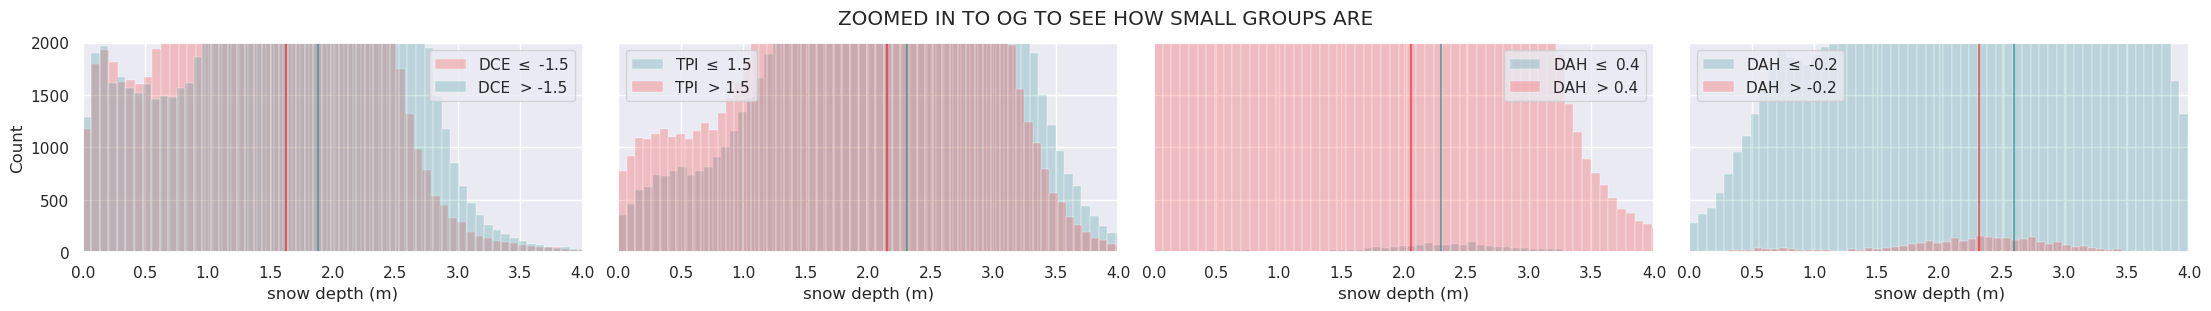

In [38]:
# Figure for all random forest results
fig, axes = plt.subplots(1,4, figsize=(22,3), constrained_layout = True, sharex=True, sharey=True)
# fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)

fig.suptitle('ZOOMED IN TO ORIGIONAL RANDOM FOREST RESULTS TO SEE HOW SMALL GROUPS ARE')



# TPI
sns.histplot(ax=axes[0], data=bin2_lrl, bins=100, color=color_num2, label='DCE $\leq$ -1.5', alpha=.2)
sns.histplot(ax=axes[0], data=bin2_lrr, bins=100, color=color_num1, label='DCE  > -1.5', alpha=.2)

axes[0].axvline(x=bin2_lrl.median(),  color=color_num2, alpha=.5) 
axes[0].axvline(x=bin2_lrr.median(),  color=color_num1, alpha=.5) 

# DCE
sns.histplot(ax=axes[1], data=bin2_lll, bins=100, color=color_num1, label='TPI $\leq$ 1.5', alpha=.2)
sns.histplot(ax=axes[1], data=bin2_llr, bins=100, color=color_num2, label='TPI  > 1.5', alpha=.2)

axes[1].axvline(x=bin2_lll.median(),  color=color_num1, alpha=.5) 
axes[1].axvline(x=bin2_llr.median(),  color=color_num2, alpha=.5) 



# DAH
sns.histplot(ax=axes[2], data=bin2_rrl, bins=100, color=color_num1, label='DAH $\leq$ 0.4', alpha=.2)
sns.histplot(ax=axes[2], data=bin2_rrr, bins=100, color=color_num2, label='DAH  > 0.4', alpha=.2)

axes[2].axvline(x=bin2_rrl.median(),  color=color_num1, alpha=.5) 
axes[2].axvline(x=bin2_rrr.median(),  color=color_num2, alpha=.5) 

# DAH
sns.histplot(ax=axes[3], data=bin2_rll, bins=100, color=color_num1, label='DAH $\leq$ -0.2', alpha=.2)
sns.histplot(ax=axes[3], data=bin2_rlr, bins=100, color=color_num2, label='DAH  > -0.2', alpha=.2)

axes[3].axvline(x=bin2_rll.median(),  color=color_num1, alpha=.5) 
axes[3].axvline(x=bin2_rlr.median(),  color=color_num2, alpha=.5) 


# OLD LABELS 
# axes[0].set_title("TPI $\leq$  1.5")
# axes[1].set_title("DCE $\leq$ -1.5")
# axes[2].set_title("DAH $\leq$ -0.2")
# axes[3].set_title("DAH $\leq$  0.4")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')
axes[2].set_xlabel('snow depth (m)')
axes[3].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

# Set limits 
axes[0].set_xlim([0, 4])
axes[1].set_xlim([0, 4])
axes[2].set_xlim([0, 4])
axes[3].set_xlim([0, 4])

axes[0].set_ylim([0, 2000])
# axes[1].set_ylim([0, 10000])
# axes[2].set_ylim([0, 10000])
# axes[3].set_ylim([0, 10000])

(0.0, 4.0)

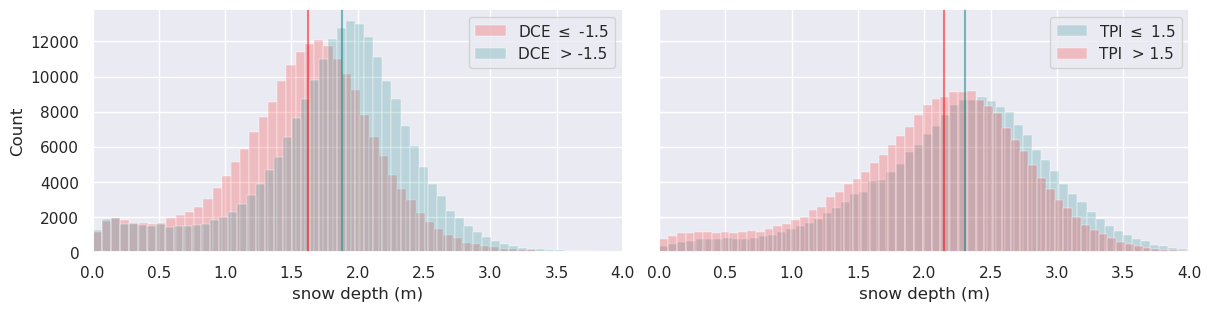

In [39]:
# Figure for all random forest results
# fig, axes = plt.subplots(1,4, figsize=(22,3), constrained_layout = True, sharex=True, sharey=True)
fig, axes = plt.subplots(1,2, figsize=(12,3), constrained_layout = True, sharex=True, sharey=True)

# fig.suptitle('Bin 2 Row 3')

# TPI
sns.histplot(ax=axes[0], data=bin2_lrl, bins=100, color=color_num2, label='DCE $\leq$ -1.5', alpha=.2)
sns.histplot(ax=axes[0], data=bin2_lrr, bins=100, color=color_num1, label='DCE  > -1.5', alpha=.2)

axes[0].axvline(x=bin2_lrl.median(),  color=color_num2, alpha=.5) 
axes[0].axvline(x=bin2_lrr.median(),  color=color_num1, alpha=.5) 

# DCE
sns.histplot(ax=axes[1], data=bin2_lll, bins=100, color=color_num1, label='TPI $\leq$ 1.5', alpha=.2)
sns.histplot(ax=axes[1], data=bin2_llr, bins=100, color=color_num2, label='TPI  > 1.5', alpha=.2)

axes[1].axvline(x=bin2_lll.median(),  color=color_num1, alpha=.5) 
axes[1].axvline(x=bin2_llr.median(),  color=color_num2, alpha=.5) 


# OLD LABELS 
# axes[0].set_title("TPI $\leq$  1.5")
# axes[1].set_title("DCE $\leq$ -1.5")
# axes[2].set_title("DAH $\leq$ -0.2")
# axes[3].set_title("DAH $\leq$  0.4")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')


axes[0].legend()
axes[1].legend()


# Set limits 
axes[0].set_xlim([0, 4])
axes[1].set_xlim([0, 4])

## Bin 3

In [42]:
# building the decision tree from top to bottom, row one through three (l:left, to r:right decisions)
# row one 
bin3_l = all_bin3.snowdepth.where((all_bin3.dah <= .265)) 
bin3_r = all_bin3.snowdepth.where((all_bin3.dah >  .265)) 

# row two 
bin3_ll = all_bin3.snowdepth.where((all_bin3.dah <= .265) & (all_bin3.dah <= -.325))
bin3_lr = all_bin3.snowdepth.where((all_bin3.dah <= .265) & (all_bin3.dah >  -.325)) 
bin3_rl = all_bin3.snowdepth.where((all_bin3.dah >  .265) & (all_bin3.tpi <= 0.855)) 
bin3_rr = all_bin3.snowdepth.where((all_bin3.dah >  .265) & (all_bin3.tpi >  0.855))

# row three 
bin3_lll = all_bin3.snowdepth.where((all_bin3.dah <= .265) & (all_bin3.dah <= -.325) & (all_bin3.dce <= -0.5)) # only difference between a and b is the dce 
bin3_llr = all_bin3.snowdepth.where((all_bin3.dah <= .265) & (all_bin3.dah <= -.325) & (all_bin3.dce >  -0.5))

bin3_lrl = all_bin3.snowdepth.where((all_bin3.dah <= .265) & (all_bin3.dah > -.325) & (all_bin3.tpi <= 0.825)) # only difference between c and d is tpi
bin3_lrr = all_bin3.snowdepth.where((all_bin3.dah <= .265) & (all_bin3.dah > -.325) & (all_bin3.tpi >  0.825))

bin3_rll = all_bin3.snowdepth.where((all_bin3.dah > .265) & (all_bin3.tpi <= 0.855) & (all_bin3.tpi <= 0.285)) # only difference between e and f is tpi
bin3_rlr = all_bin3.snowdepth.where((all_bin3.dah > .265) & (all_bin3.tpi <= 0.855) & (all_bin3.tpi >  0.285))

bin3_rrl = all_bin3.snowdepth.where((all_bin3.dah > .265) & (all_bin3.tpi >  0.855) & (all_bin3.dah <= 0.525)) # only difference between g and h is dah
bin3_rrr = all_bin3.snowdepth.where((all_bin3.dah > .265) & (all_bin3.tpi >  0.855) & (all_bin3.dah >  0.525)) 

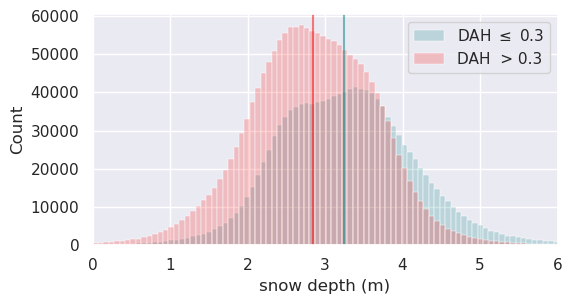

In [43]:
# Figure for all random forest results
# Bin 3, Row 1
plt.rcParams['figure.figsize'] = [6,3] #overriding size
sns.histplot(data=bin3_l, bins=100, color=color_num1, label='DAH $\leq$ 0.3', alpha=.2)
sns.histplot(data=bin3_r, bins=100, color=color_num2, label='DAH  > 0.3', alpha=.2)

plt.axvline(x=bin3_l.median(),  color=color_num1, alpha=.5) 
plt.axvline(x=bin3_r.median(),  color=color_num2, alpha=.5) 

# plt.title('Bin 3 Row 1 \nDAH $\leq$ 0.3')
# plt.ylim([0,2000])
plt.xlim([0,6])

plt.xlabel('snow depth (m)')
plt.legend()

(0.0, 6.0)

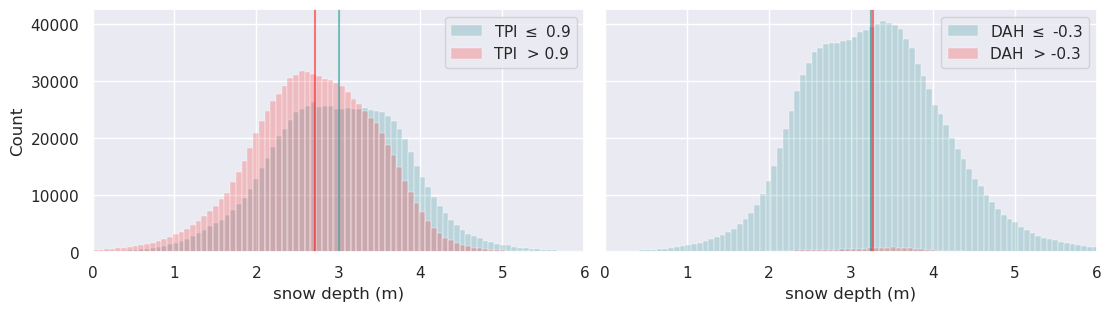

In [44]:
# Figure for all random forest results
# Bin 3, Row 2
fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)
# fig.suptitle('Bin 3 Row 2')


# TPI
sns.histplot(ax=axes[0], data=bin3_rl, bins=100, color=color_num1, label='TPI $\leq$ 0.9', alpha=.2)
axes[0].axvline(x=bin3_rl.median(),  color=color_num1, alpha=.5) 
sns.histplot(ax=axes[0], data=bin3_rr, bins=100, color=color_num2, label='TPI  > 0.9', alpha=.2)
axes[0].axvline(x=bin3_rr.median(),  color=color_num2, alpha=.5) 


# DAH
sns.histplot(ax=axes[1], data=bin3_ll, bins=100, color=color_num1, label='DAH $\leq$ -0.3', alpha=.2)
axes[1].axvline(x=bin3_ll.median(),  color=color_num1, alpha=.5) 
sns.histplot(ax=axes[1], data=bin3_lr, bins=100, color=color_num2, label='DAH  > -0.3', alpha=.2)
axes[1].axvline(x=bin3_lr.median(),  color=color_num2, alpha=.5) 

# OLD LABELS 
# axes[0].set_title("DAH $\leq$ -0.3") 
# axes[1].set_title("TPI $\leq$  0.9") 

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()

# Set limits 
axes[0].set_xlim([0, 6])
axes[1].set_xlim([0, 6])

# axes[0].set_ylim([0, 10000])
# axes[1].set_ylim([0, 10000])

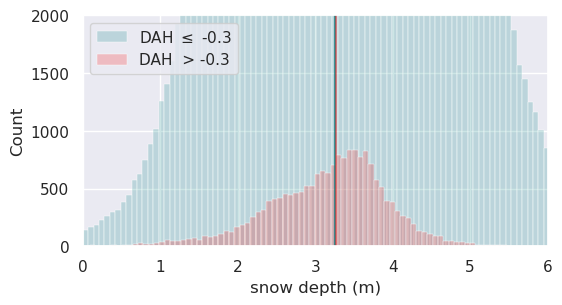

In [66]:
# Figure for all random forest results
# Bin 3, Row 2
plt.rcParams['figure.figsize'] = [6,3] #overriding size

# DAH
sns.histplot(data=bin3_ll, bins=100, color=color_num1, label='DAH $\leq$ -0.3', alpha=.2)
plt.axvline(x=bin3_ll.median(),  color=color_num1, alpha=.7) 
sns.histplot(data=bin3_lr, bins=100, color=color_num2, label='DAH  > -0.3', alpha=.2)
plt.axvline(x=bin3_lr.median(),  color=color_num2, alpha=.4)

plt.ylim([0,2000])
plt.xlim([0,6])

plt.xlabel('snow depth (m)')
plt.legend()

(0.0, 6.0)

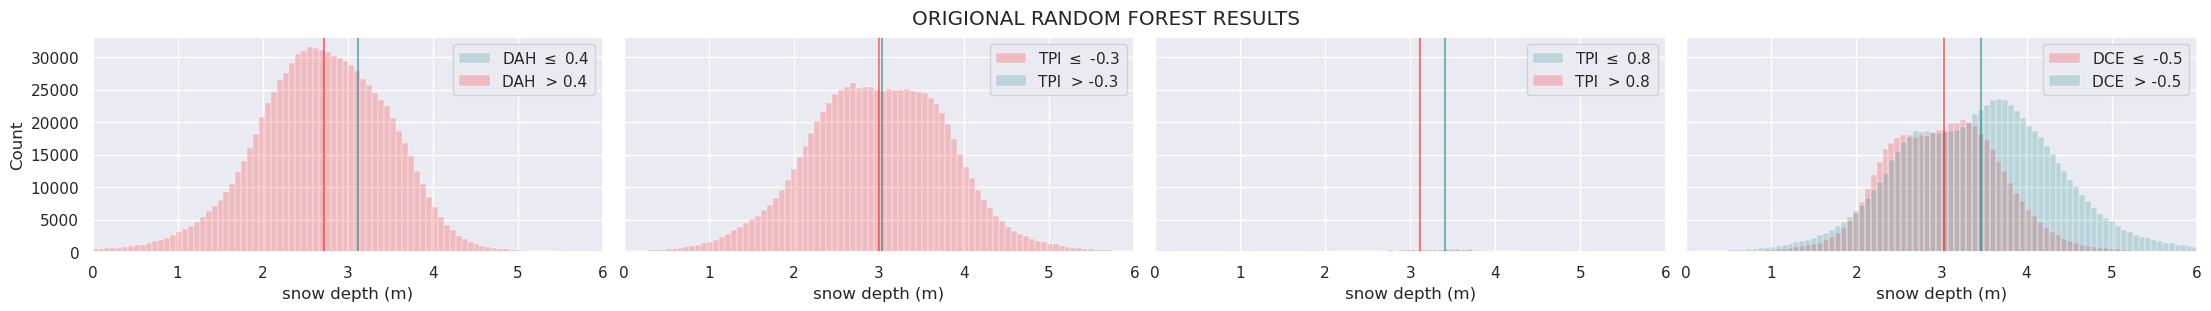

In [59]:
# Figure for all random forest results
fig, axes = plt.subplots(1,4, figsize=(22,3), constrained_layout = True, sharex=True, sharey=True)
# fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)
fig.suptitle('ORIGIONAL RANDOM FOREST RESULTS')


# DAH
sns.histplot(ax=axes[0], data=bin3_rrl, bins=100, color=color_num1, label='DAH $\leq$ 0.4', alpha=.2)
sns.histplot(ax=axes[0], data=bin3_rrr, bins=100, color=color_num2, label='DAH  > 0.4', alpha=.2)

axes[0].axvline(x=bin3_rrl.median(),  color=color_num1, alpha=.5) 
axes[0].axvline(x=bin3_rrr.median(),  color=color_num2, alpha=.5) 


# TPI
sns.histplot(ax=axes[1], data=bin3_rll, bins=100, color=color_num2, label='TPI $\leq$ -0.3', alpha=.2)
sns.histplot(ax=axes[1], data=bin3_rlr, bins=100, color=color_num1, label='TPI  > -0.3', alpha=.2)

axes[1].axvline(x=bin3_rll.median(),  color=color_num2, alpha=.5) 
axes[1].axvline(x=bin3_rlr.median(),  color=color_num1, alpha=.5) 


# TPI
sns.histplot(ax=axes[2], data=bin3_lrl, bins=100, color=color_num1, label='TPI $\leq$ 0.8', alpha=.2)
sns.histplot(ax=axes[2], data=bin3_lrr, bins=100, color=color_num2, label='TPI  > 0.8', alpha=.2)

axes[2].axvline(x=bin3_lrl.median(),  color=color_num1, alpha=.5) 
axes[2].axvline(x=bin3_lrr.median(),  color=color_num2, alpha=.5) 


# DCE
sns.histplot(ax=axes[3], data=bin3_lll, bins=100, color=color_num2, label='DCE $\leq$ -0.5', alpha=.2)
sns.histplot(ax=axes[3], data=bin3_llr, bins=100, color=color_num1, label='DCE  > -0.5', alpha=.2)

axes[3].axvline(x=bin3_lll.median(),  color=color_num2, alpha=.5) 
axes[3].axvline(x=bin3_llr.median(),  color=color_num1, alpha=.5) 


# OLD LABELS 
# axes[0].set_title("DCE $\leq$ -0.5")
# axes[1].set_title("TPI $\leq$  0.8")
# axes[2].set_title("TPI $\leq$  0.3")
# axes[3].set_title("DAH $\leq$  0.5")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')
axes[2].set_xlabel('snow depth (m)')
axes[3].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

# Set limits 
axes[0].set_xlim([0, 6])
axes[1].set_xlim([0, 6])
axes[2].set_xlim([0, 6])
axes[3].set_xlim([0, 6])

# axes[0].set_ylim([0, 10000])
# axes[1].set_ylim([0, 10000])
# axes[2].set_ylim([0, 10000])
# axes[3].set_ylim([0, 10000])


(0.0, 500.0)

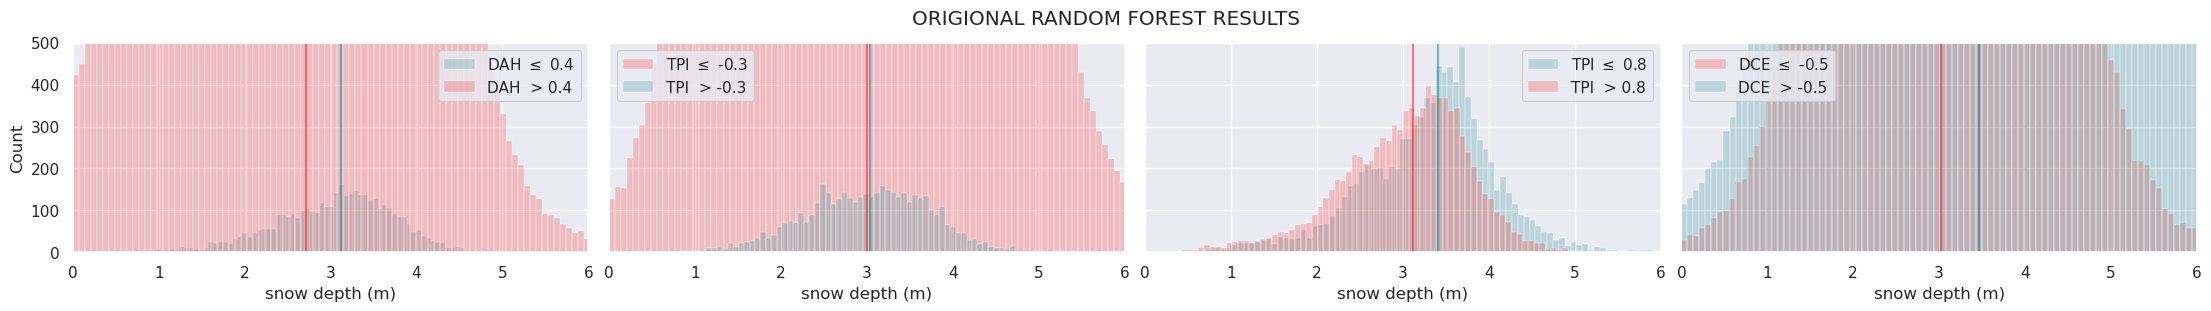

In [58]:
# Figure for all random forest results
fig, axes = plt.subplots(1,4, figsize=(22,3), constrained_layout = True, sharex=True, sharey=True)
# fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)
fig.suptitle('ORIGIONAL RANDOM FOREST RESULTS')


# DAH
sns.histplot(ax=axes[0], data=bin3_rrl, bins=100, color=color_num1, label='DAH $\leq$ 0.4', alpha=.2)
sns.histplot(ax=axes[0], data=bin3_rrr, bins=100, color=color_num2, label='DAH  > 0.4', alpha=.2)

axes[0].axvline(x=bin3_rrl.median(),  color=color_num1, alpha=.5) 
axes[0].axvline(x=bin3_rrr.median(),  color=color_num2, alpha=.5) 


# TPI
sns.histplot(ax=axes[1], data=bin3_rll, bins=100, color=color_num2, label='TPI $\leq$ -0.3', alpha=.2)
sns.histplot(ax=axes[1], data=bin3_rlr, bins=100, color=color_num1, label='TPI  > -0.3', alpha=.2)

axes[1].axvline(x=bin3_rll.median(),  color=color_num2, alpha=.5) 
axes[1].axvline(x=bin3_rlr.median(),  color=color_num1, alpha=.5) 


# TPI
sns.histplot(ax=axes[2], data=bin3_lrl, bins=100, color=color_num1, label='TPI $\leq$ 0.8', alpha=.2)
sns.histplot(ax=axes[2], data=bin3_lrr, bins=100, color=color_num2, label='TPI  > 0.8', alpha=.2)

axes[2].axvline(x=bin3_lrl.median(),  color=color_num1, alpha=.5) 
axes[2].axvline(x=bin3_lrr.median(),  color=color_num2, alpha=.5) 


# DCE
sns.histplot(ax=axes[3], data=bin3_lll, bins=100, color=color_num2, label='DCE $\leq$ -0.5', alpha=.2)
sns.histplot(ax=axes[3], data=bin3_llr, bins=100, color=color_num1, label='DCE  > -0.5', alpha=.2)

axes[3].axvline(x=bin3_lll.median(),  color=color_num2, alpha=.5) 
axes[3].axvline(x=bin3_llr.median(),  color=color_num1, alpha=.5) 


# OLD LABELS 
# axes[0].set_title("DCE $\leq$ -0.5")
# axes[1].set_title("TPI $\leq$  0.8")
# axes[2].set_title("TPI $\leq$  0.3")
# axes[3].set_title("DAH $\leq$  0.5")

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')
axes[2].set_xlabel('snow depth (m)')
axes[3].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

# Set limits 
axes[0].set_xlim([0, 6])
axes[1].set_xlim([0, 6])
axes[2].set_xlim([0, 6])
axes[3].set_xlim([0, 6])

axes[0].set_ylim([0, 500])


(0.0, 6.0)

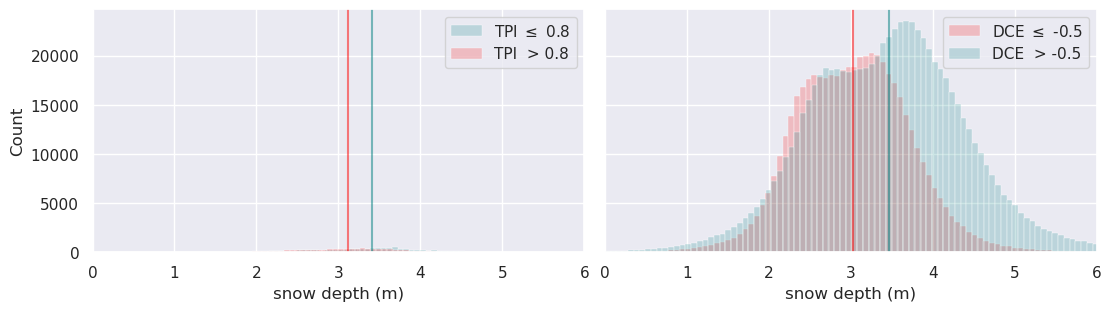

In [54]:
# Figure for all random forest results
fig, axes = plt.subplots(1,2, figsize=(11,3), constrained_layout = True, sharex=True, sharey=True)
# fig.suptitle('Bin 3 Row 3')

# TPI
sns.histplot(ax=axes[0], data=bin3_lrl, bins=100, color=color_num1, label='TPI $\leq$ 0.8', alpha=.2)
sns.histplot(ax=axes[0], data=bin3_lrr, bins=100, color=color_num2, label='TPI  > 0.8', alpha=.2)

axes[0].axvline(x=bin3_lrl.median(),  color=color_num1, alpha=.5) 
axes[0].axvline(x=bin3_lrr.median(),  color=color_num2, alpha=.5) 


# DCE
sns.histplot(ax=axes[1], data=bin3_lll, bins=100, color=color_num2, label='DCE $\leq$ -0.5', alpha=.2)
sns.histplot(ax=axes[1], data=bin3_llr, bins=100, color=color_num1, label='DCE  > -0.5', alpha=.2)

axes[1].axvline(x=bin3_lll.median(),  color=color_num2, alpha=.5) 
axes[1].axvline(x=bin3_llr.median(),  color=color_num1, alpha=.5) 

# labels
axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].legend()
axes[1].legend()

# Set limits 
axes[0].set_xlim([0, 6])
axes[1].set_xlim([0, 6])

# axes[0].set_ylim([0, 500])

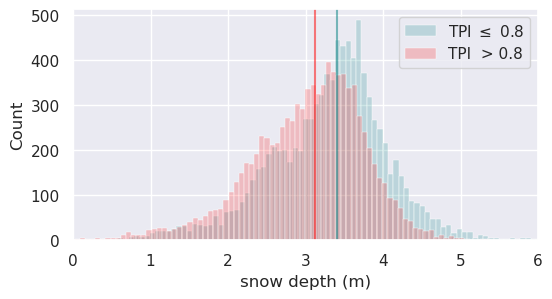

In [56]:
# Figure for all random forest results
# Bin 3, Row 3
plt.rcParams['figure.figsize'] = [6,3] #overriding size

# TPI
sns.histplot(data=bin3_lrl, bins=100, color=color_num1, label='TPI $\leq$ 0.8', alpha=.2)
sns.histplot(data=bin3_lrr, bins=100, color=color_num2, label='TPI  > 0.8', alpha=.2)

plt.axvline(x=bin3_lrl.median(),  color=color_num1, alpha=.5) 
plt.axvline(x=bin3_lrr.median(),  color=color_num2, alpha=.5) 

# plt.ylim([0,2000])
plt.xlim([0,6])

plt.xlabel('snow depth (m)')
plt.legend()

## PDFS

In [19]:
# df
# all_bin1
# all_bin2
# all_bin3

In [20]:
from scipy import stats
from scipy.stats import norm


(-15.0, 15.0)

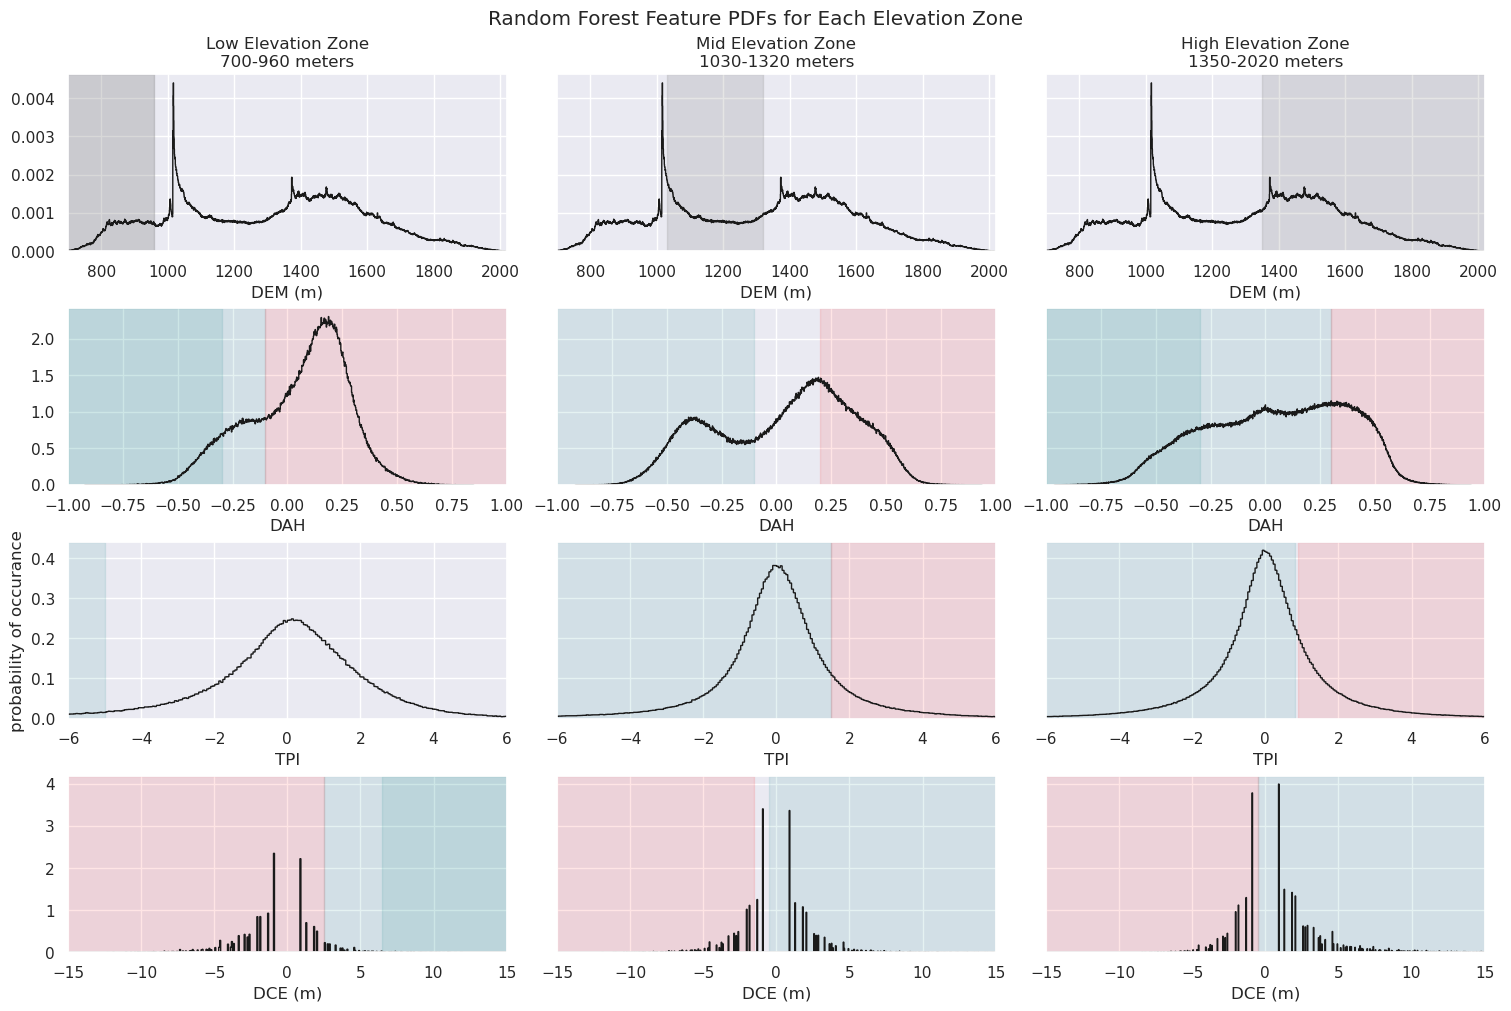

In [69]:
# PDFs of all variables 
fig, axes = plt.subplots(4,3, figsize=(15,10), constrained_layout = True, sharex='row', sharey='row')
fig.suptitle('Random Forest Feature PDFs for Each Elevation Zone')

fill_color='grey'

# COLUMN 1________________________________________________________________________
# dem
axes[0,0].hist(df.dem, bins='sqrt', density=True, edgecolor='k', histtype='step')

# All the bin numbers for elevation
axes[0,0].axvspan(df.dem.min(), 960,  alpha=.3, color=fill_color) # bin 1 


# dah
axes[1,0].hist((all_bin1.dah)/100, bins='sqrt', density=True, edgecolor='k', histtype='step')

# bin 1 numbers for random forest results 
axes[1,0].axvspan(-1, -0.3, alpha=.1, color=color_more) # very shady terrain
axes[1,0].axvspan(-1, -0.1, alpha=.1, color=color_more) # shady terrain
axes[1,0].axvspan(-0.1, 1,  alpha=.1, color=color_less) # all other terrain

# fig.text(0.04, 0.66, 'very shady terrain')
# fig.text(0.24, 0.66, 'all other terrain')


# tpi
axes[2,0].hist((all_bin1.tpi)/100, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[2,0].axvspan(-10,-5.0, alpha=.1, color=color_more) # removing this directionality for right now because of the weird values

# dce
axes[3,0].hist(all_bin1.dce, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[3,0].axvspan(-20, 2.5, alpha=.1, color=color_less) # forest edges and forest 
axes[3,0].axvspan(2.5, 20, alpha=.1, color=color_more) # small gaps 

axes[3,0].axvspan(6.5, 20, alpha=.1, color=color_more) # large gaps 

# fig.text(0.05, 0.18, 'forest edges \nand forest')
# fig.text(0.208, 0.16, 'very \nsmall\ngaps')
# fig.text(0.258, 0.18, 'small \ngaps')
# fig.text(0.30, 0.18, 'large \ngaps')


# COLUMN 2________________________________________________________________________
# dem
axes[0,1].hist(df.dem, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[0,1].axvspan(1030, 1320, alpha=.2, color=fill_color) # bin 2

# dah
axes[1,1].hist((all_bin2.dah)/100, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[1,1].axvspan(-1,-0.1, alpha=.1, color=color_more) # shady

axes[1,1].axvspan(0.2,1, alpha=.1, color=color_less) # very sunny
# axes[1,1].axvspan(0.4,1, alpha=.1, color=color_less) # very sunny



# tpi
axes[2,1].hist((all_bin2.tpi)/100, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[2,1].axvspan(-20, 1.5, alpha=.1, color=color_more) # all other terrain
axes[2,1].axvspan(1.5, 20, alpha=.1, color=color_less) # convex ridges


# dce
axes[3,1].hist(all_bin2.dce, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[3,1].axvspan(-20, -1.5, alpha=.1, color=color_less) # forest 
axes[3,1].axvspan(-0.5, 20, alpha=.1, color=color_more) # gaps 


# COLUMN 3________________________________________________________________________
# dem
axes[0,2].hist(df.dem, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[0,2].axvspan(1350, df.dem.max(), alpha=.2, color=fill_color) # bin 2

# dah
axes[1,2].hist((all_bin3.dah)/100, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[1,2].axvspan(-1,0.3, alpha=.1, color=color_more)  # shady
axes[1,2].axvspan(-1,-0.3, alpha=.1, color=color_more) # very shady
axes[1,2].axvspan(0.3,1, alpha=.1, color=color_less)   # sunny


# tpi
axes[2,2].hist((all_bin3.tpi)/100, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[2,2].axvspan(-10,0.8, alpha=.1, color=color_more)   # concave terrain
axes[2,2].axvspan(0.9,10, alpha=.1, color=color_less)   # convex terrain


# dce
axes[3,2].hist(all_bin3.dce, bins='sqrt', density=True, edgecolor='k', histtype='step')
axes[3,2].axvspan(-20, -0.5, alpha=.1, color=color_less) # forest 
axes[3,2].axvspan(-0.5, 20, alpha=.1, color=color_more) # gap 


# labels
axes[0,0].set_title('Low Elevation Zone\n700-960 meters')
axes[0,1].set_title('Mid Elevation Zone\n1030-1320 meters')
axes[0,2].set_title('High Elevation Zone\n1350-2020 meters')

axes[0,1].set_xlabel('DEM (m)'); axes[0,0].set_xlabel('DEM (m)'); axes[0,2].set_xlabel('DEM (m)')
axes[1,1].set_xlabel('DAH');     axes[1,0].set_xlabel('DAH');     axes[1,2].set_xlabel('DAH')
axes[2,1].set_xlabel('TPI');     axes[2,0].set_xlabel('TPI');     axes[2,2].set_xlabel('TPI')
axes[3,1].set_xlabel('DCE (m)'); axes[3,0].set_xlabel('DCE (m)'); axes[3,2].set_xlabel('DCE (m)')

# fig.text(-0.01, 0.3, 'probability of occurance', rotation=90)
axes[2,0].set_ylabel('probability of occurance')

# set limits 
axes[0,0].set_xlim([700, 2020])
axes[1,0].set_xlim([-1, 1])
axes[2,0].set_xlim([-6, 6])
axes[3,0].set_xlim([-15, 15])